<a href="https://colab.research.google.com/github/khalidakram07/Real-Estate/blob/main/realestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -U -q PyDrive
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1jnd9kqvJaIuAIP0S1biVHrGMq_mK3GzO"}) 
downloaded.GetContentFile('apartments_for_rent_classified_10K.xlsx')  
#df = pd.read_csv('apartments_for_rent_classified_10K.xlsx')

In [ ]:
from pandas import read_excel
my_sheet = 'apartments_for_rent_classif (2)' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'apartments_for_rent_classified_10K.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
df.head() # shows headers with top 5 rows

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


STEP2: Finding missing data


In [ ]:
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

Using isnull().sum on dataframe object df we find all missing values. We have Amenities=3549,Bathrooms=33,Bedrooms, Pet_allowed=1745, address=3325, cityname=77, state=77, latitute=10,longitude=10.


In [ ]:
#Total no of rows missing
sum(df.isnull().any(axis=1))

6457

In [ ]:
#checking missing values in column amenities
# creating bool series True for NaN values 
bool_series = pd.isnull(df["amenities"]) 
	
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5659917503,housing/rent/apartment,Four BR 17595 Burl Oak Court,"This unit is located at 17595 Burl Oak Court, ...",NaN,5.0,4.0,USD,No,Thumbnail,None,4500,"$4,500",Monthly,5407,17595 Burl Oak CT,Eden Prairie,MN,44.8653,-93.4749,RentLingo,1576667692
9994,5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,This unit is located at 2536 W Canyon Ridge Rd...,NaN,4.0,6.0,USD,No,Thumbnail,None,3000,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37.0835,-113.5823,RentLingo,1577017103
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419


In [ ]:
#checking missing values in column cityname           
# creating bool series True for NaN values 
nan_city_name = pd.isnull(df["cityname"]) 
	
# filtering data 
# displaying data only with Gender = NaN 
df[nan_city_name] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
22,5664567303,housing/rent/apartment,One BR Leeward Ct,"This unit is located at Leeward Ct, Fleming Is...",NaN,1.0,1.0,USD,No,Thumbnail,None,525,$525,Monthly,200,NaN,NaN,NaN,NaN,NaN,RentLingo,1577014825
31,5668619369,housing/rent/apartment,One BR Mullica Way,"This unit is located at Mullica Way, Devonshir...",Pool,1.0,1.0,USD,No,Thumbnail,None,750,$750,Monthly,219,NaN,NaN,NaN,NaN,NaN,RentLingo,1577358921
37,5664573404,housing/rent/apartment,One BR New Providence Dr Apartment 90,This unit is located at New Providence Dr Apar...,NaN,1.0,1.0,USD,No,Thumbnail,None,750,$750,Monthly,220,NaN,NaN,NaN,NaN,NaN,RentLingo,1577015212
76,5664574093,housing/rent/apartment,One BR 8th Avenue North,"This unit is located at eighth Avenue North, O...",NaN,1.0,1.0,USD,No,Thumbnail,None,1025,"$1,025",Monthly,250,8th Ave North,NaN,NaN,39.8163,-98.5576,RentLingo,1577015259
161,5668622658,housing/rent/apartment,One BR Hinson Ave,"This unit is located at Hinson Ave, Haines, 33...",Pool,1.0,1.0,USD,No,Thumbnail,None,625,$625,Monthly,250,NaN,NaN,NaN,NaN,NaN,RentLingo,1577359130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,5664596769,housing/rent/apartment,"Two BR 1833 Lombard St, Unit B","This unit is located at 1833 Lombard St, Unit ...",NaN,1.0,2.0,USD,No,Thumbnail,None,2095,"$2,095",Monthly,1650,1833 Lombard St Unit B,NaN,NaN,39.8163,-98.5576,RentLingo,1577017017
9259,5664597711,housing/rent/apartment,Two BR Lakeside Blvd,"This unit is located at Lakeside Blvd, Shelby ...",NaN,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1650,"$1,650",Monthly,1665,NaN,NaN,NaN,NaN,NaN,RentLingo,1577017108
9542,5668624794,housing/rent/apartment,Five BR 22 Austin Street,"This unit is located at 22 Austin Street, Char...","Dishwasher,Parking,Patio/Deck,Refrigerator",2.0,5.0,USD,No,Thumbnail,None,4500,"$4,500",Monthly,1950,22 Austin St,NaN,NaN,39.8163,-98.5576,RentLingo,1577359268
9561,5668633890,housing/rent/apartment,Three BR 229 Delmont St #259,"This unit is located at 229 Delmont St #259, C...",NaN,2.0,3.0,USD,No,Thumbnail,"Cats,Dogs",1985,"$1,985",Monthly,1975,229 Delmont St #259,NaN,NaN,39.8163,-98.5576,RentLingo,1577359942


In [ ]:
# Checking out the total unique categories in the dataset
np.unique(df['category'])

# Found that there are 3 unique categories ['housing/rent/apartment', 'housing/rent/home', 'housing/rent/short_term']

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [ ]:
# checking that what are the occurences of each unique categories in the dataset
df['category'].value_counts()
df.drop(index=df[df['category'] == 'housing/rent/short_term'].index, inplace=True)
df.drop(index=df[df['category'] == 'housing/rent/home'].index, inplace=True)
df['category'].value_counts()
del df['category']
print(df.head())

           id  ...        time
0  5668626895  ...  1577359415
1  5664597177  ...  1577017063
2  5668626833  ...  1577359410
3  5659918074  ...  1576667743
4  5668626759  ...  1577359401

[5 rows x 21 columns]


In [ ]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.996000e+03,9963.000000,9989.000000,9996.000000,9996.000000,9986.000000,9986.000000,9.996000e+03
mean,5.623385e+09,1.381612,1.744018,1486.634654,945.864646,37.696554,-94.653289,1.574891e+09
std,7.022179e+07,0.611336,0.942503,1076.572608,655.878961,5.496069,15.761776,3.763036e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.688675,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.500000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.194625,1.577359e+09
max,5.668663e+09,8.000000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [ ]:
df.shape

(9996, 21)

In [ ]:
df.tail(5)

,id,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
9995,5630240092,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.0,6.0,USD,No,Thumbnail,None,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186
9999,5509132540,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,USD,No,No,NaN,1009,"$1,009",Monthly,880,NaN,Lawrenceville,GA,34.0072,-84.0034,RentDigs.com,1577362141


In [ ]:
np.unique(df['currency'])

array(['USD'], dtype=object)

Visualize dataset for distribution by Constructing histograms, box plots, and scatter plots


In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

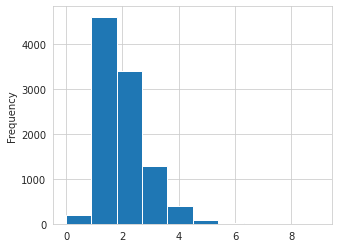

In [ ]:

df.columns = ['ID','Title','Body','amenities'	,'bathrooms'	,'bedrooms',	'currency',	'fee',	'has_photo',	'pets_allowed'	,'price'	,'price_display'	,'price_type'	,'square_feet'	,'address',	'cityname'	,'state',	'latitude'	,'longitude'	,'source'	,'time']
df.index = df.price
price = df['bedrooms']

bedrooms.plot(kind='hist')

[]

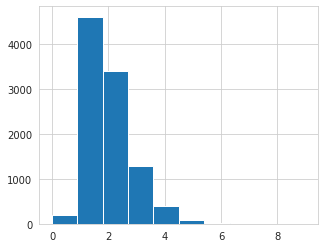

In [ ]:
plt.hist(bedrooms)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


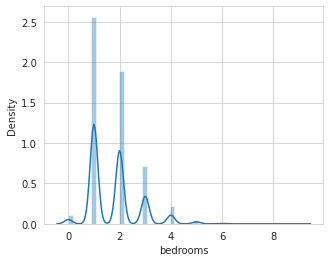

In [ ]:
sb.distplot(bedrooms)

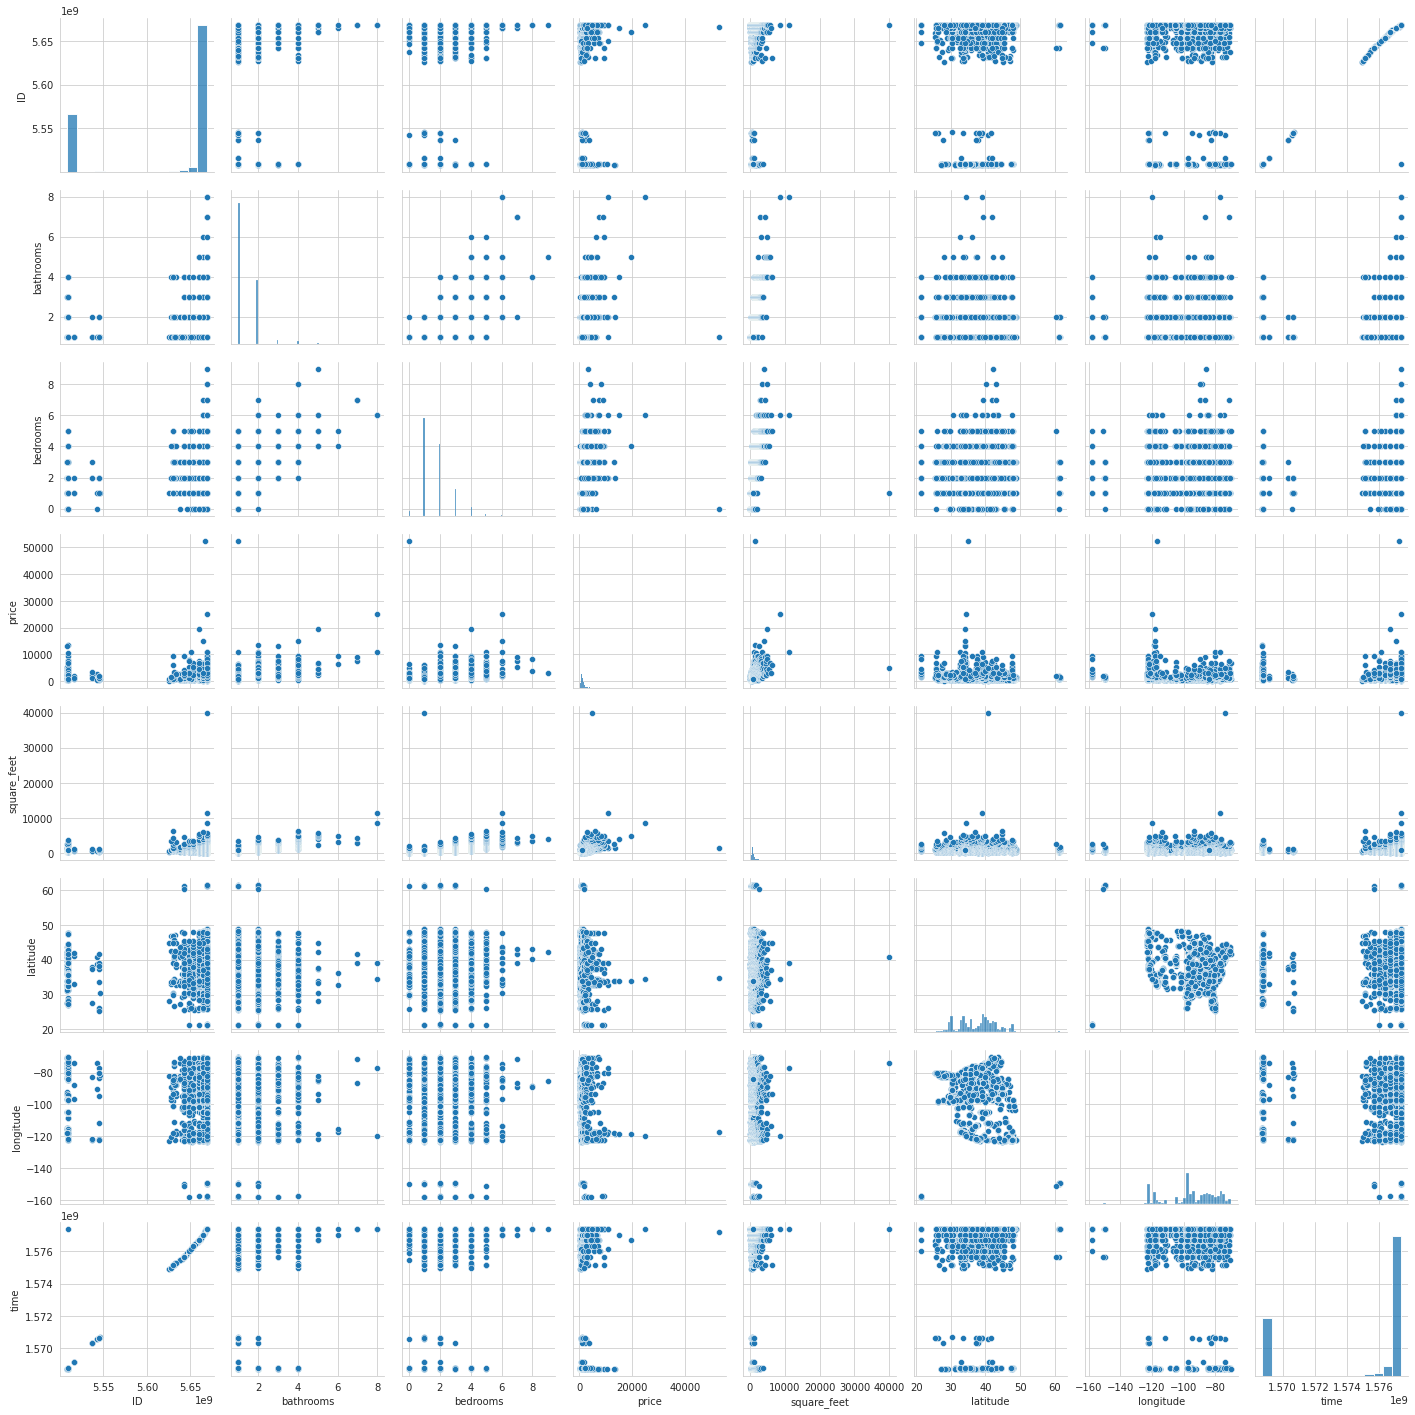

In [ ]:
sb.pairplot(df)

after knowing out dataset including complete visualization we can start by dropping unncesary columns like time...

In [ ]:
del df['time']
df.head(5)

,ID,Title,Body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source
price,,,,,,,,,,,,,,,,,,,,
790,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo
425,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo
1390,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo
925,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo
880,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo


Dropping address column as the same is avaiblbe in title 

In [ ]:
del df['address']
df.head(5)

,ID,Title,Body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source
price,,,,,,,,,,,,,,,,,,,
790,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo
425,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo
1390,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo
925,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo
880,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo


Merging Title+cityname+state+latititute+longitude = Full_address

In [ ]:
df["Full_address"] = df["Title"] + df["cityname"]+df["state"]


In [ ]:

df.head()

,ID,Title,Body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,Full_address
price,,,,,,,,,,,,,,,,,,,,
790,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
425,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,Studio apartment 814 Schutte RoadEvansvilleIN
1390,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,"Studio apartment N Scott St, 14th St N, Arling..."
925,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,Studio apartment 1717 12th AveSeattleWA
880,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,"Studio apartment Washington Blvd, N Cleveland ..."


In [ ]:
del df["Title"] 
del df["cityname"]
del df["state"]
del df["Body"]

In [ ]:
df.head()

,ID,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,latitude,longitude,source,Full_address
price,,,,,,,,,,,,,,,,
790,5668626895,NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,38.9057,-76.9861,RentLingo,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
425,5664597177,NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,37.9680,-87.6621,RentLingo,Studio apartment 814 Schutte RoadEvansvilleIN
1390,5668626833,NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,38.8910,-77.0816,RentLingo,"Studio apartment N Scott St, 14th St N, Arling..."
925,5659918074,NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,47.6160,-122.3275,RentLingo,Studio apartment 1717 12th AveSeattleWA
880,5668626759,NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,38.8738,-77.1055,RentLingo,"Studio apartment Washington Blvd, N Cleveland ..."


Redundant columns-amenties,has_photo,price_display,(maybe-source)

In [ ]:
np.unique(df['price_type'])

array(['Monthly', 'Monthly|Weekly', 'Weekly'], dtype=object)